**Problema 1:**

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


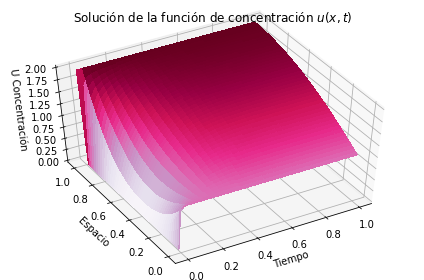

In [9]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval puntos en el espacio
N = 60 # GRID POINTS on time interval puntos en el tiempo

#posición inicial
x0 = 0
#posición final
xL = 1

# ----- Spatial discretization step -----/ paso espacial
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0
#Tiempo final
tF = 1

# ----- Time step -----/ pasos para el tiempo
dt = (tF - t0)/(N - 1)

# Diffusion coefficient/ Coeficiente de difusión
D = 1  

# Reaction rate/ Taza de reacción
alpha = 1 

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----/ Empieza la matriz U
U = np.zeros((M, N))

#----- Initial condition -----/Condición inicial
U[:,0] = np.zeros(xspan.shape)

#----- Dirichlet boundary conditions -----/Condiciones de frontera tipo Dirichlet
U[0,:] = 1 
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    # Right hand side lado derecho 
    b = b1 + b2  
    # Solve x=A\b solución x=A/b
    U[1:M-1, k] = np.linalg.solve(A,b)  

# ----- Checks if the solution is correct: verificar si la solución es corrects
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
ax.view_init(50, -120)
ax.set_title('Solución de la función de concentración $u(x,t)$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()

Vemos que U es la concentración del compuesto químico, cuando es 0 observamos que el compuesto químico se va estabilizando conforme va pasando el tiempo. En cuantos mas ggrande el espacio habrá un mayor concentración estabilizándose. 

Problema 2:

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


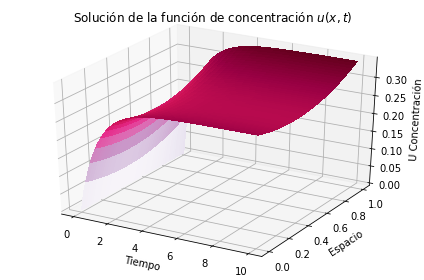

In [14]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval puntos en el espacio
N = 60 # GRID POINTS on time interval puntos en el tiempo

#posición inicial
x0 = 0
#posición final
xL = 1

# ----- Spatial discretization step -----/ paso espacial
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0
#Tiempo final
tF = 10

# ----- Time step -----/ pasos para el tiempo
dt = (tF - t0)/(N - 1)

# Diffusion coefficient/ Coeficiente de difusión
D = 1  

# Reaction rate/ Taza de reacción
alpha = -1 

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----/ Empieza la matriz U
U = np.zeros((M, N))

#----- Initial condition -----/Condición inicial
U[:,0] = np.zeros(xspan.shape)

#----- Neumann boundary conditions -----/Contición inicial tipo Neumann
leftBC = np.arange(1, N+1)
f = np.ones([N +1,1]) *0.1

rightBC = np.arange(1, N+1)
g = np.ones([N+1,1]) *0.2

for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    # Right hand side/Lado derecho
    b = b1 + b2
    # Solve x=A\b/Resolver x=A/b 
    U[0:M, k] = np.linalg.solve(A,b)    

# ----- Checks if the solution is correct:verificar si la solución es correcta
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc) 


# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
#ax.view_init(50, -120)
ax.set_title('Solución de la función de concentración $u(x,t)$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()

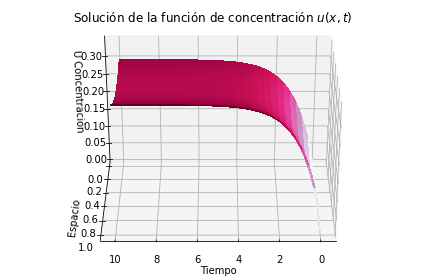

In [13]:
# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
ax.view_init(30, 90)
ax.set_title('Solución de la función de concentración $u(x,t)$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()

Cuando va llenandose el tubo se ve el aumento de concentracion va rápido y después de cieerto tiempi t=4 se estabiliza conforme va aumentando el compuesto.

Problema 3:

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


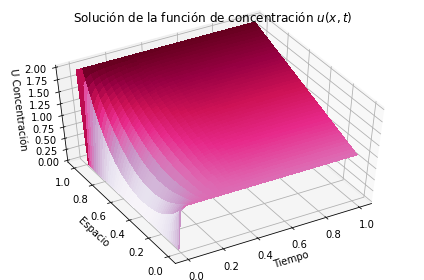

In [39]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval puntos en el espacio
N = 60 # GRID POINTS on time interval puntos en el tiempo

#posición inicial
x0 = 0
#posición final
xL = 1

# ----- Spatial discretization step -----/ paso espacial
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0
#Tiempo final
tF = 1

# ----- Time step -----/ pasos para el tiempo
dt = (tF - t0)/(N - 1)

# Diffusion coefficient/ Coeficiente de difusión
D = 1  

# Reaction rate/ Taza de reacción
alpha = 0 

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----/ Empieza la matriz U
U = np.zeros((M, N))

#----- Initial condition -----/Condición inicial
U[:,0] = np.zeros(xspan.shape)

#----- Dirichlet boundary conditions -----/Condiciones de frontera tipo Dirichlet
U[0,:] = 1 
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    # Right hand side lado derecho 
    b = b1 + b2  
    # Solve x=A\b solución x=A/b
    U[1:M-1, k] = np.linalg.solve(A,b)  

# ----- Checks if the solution is correct: verificar si la solución es corrects
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
ax.view_init(50, -120)
ax.set_title('Solución de la función de concentración $u(x,t)$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()

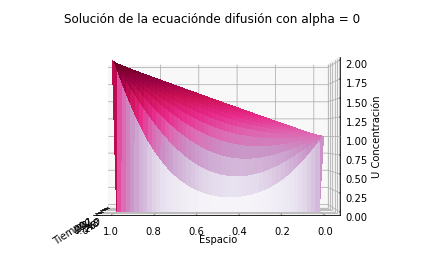

In [40]:
# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
ax.view_init(0, 180)
ax.set_title('Solución de la ecuaciónde difusión con alpha = 0')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()

Sucede lo mismo qu en el problema 1 sabemos que $\alpha = 0$ que es mayor a cuando $\alpha = -1$ ya que no hay reacción y observamos que entre más grande sea $\alpha$ mayor concentración por eso cuando $\alpha =-1$ no se ve tanta diferencia y vemos un poco más curva la línea cuando es $\alpha=-1$, como se observa en la gráfica de abajo.

True


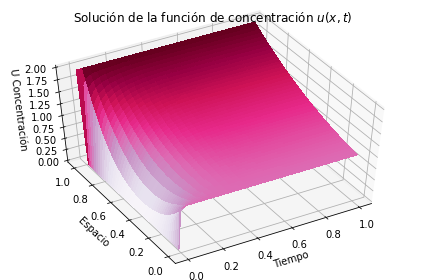

In [41]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval puntos en el espacio
N = 60 # GRID POINTS on time interval puntos en el tiempo

#posición inicial
x0 = 0
#posición final
xL = 1

# ----- Spatial discretization step -----/ paso espacial
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0
#Tiempo final
tF = 1

# ----- Time step -----/ pasos para el tiempo
dt = (tF - t0)/(N - 1)

# Diffusion coefficient/ Coeficiente de difusión
D = 1  

# Reaction rate/ Taza de reacción
alpha = -1 

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----/ Empieza la matriz U
U = np.zeros((M, N))

#----- Initial condition -----/Condición inicial
U[:,0] = np.zeros(xspan.shape)

#----- Dirichlet boundary conditions -----/Condiciones de frontera tipo Dirichlet
U[0,:] = 1 
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    # Right hand side lado derecho 
    b = b1 + b2  
    # Solve x=A\b solución x=A/b
    U[1:M-1, k] = np.linalg.solve(A,b)  

# ----- Checks if the solution is correct: verificar si la solución es corrects
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
ax.view_init(50, -120)
ax.set_title('Solución de la función de concentración $u(x,t)$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()

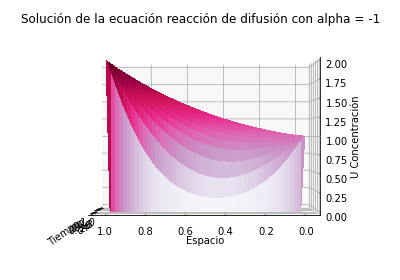

In [42]:
# ----- Surface plot ----- superficie de la gráfica
X, T = np.meshgrid(tspan, xspan)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.PuRd, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
#para cambiar la perspectiva
ax.view_init(0, 180)
ax.set_title('Solución de la ecuación reacción de difusión con alpha = -1')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U Concentración')
plt.tight_layout()
plt.show()